In [88]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df = pd.read_csv('../data/train.csv')
y = df['Y']
X = df.drop('Y', axis=1)

In [72]:
df.describe()
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       750 non-null    float64
 1   X1      750 non-null    int64  
 2   X2      750 non-null    int64  
 3   X3      750 non-null    float64
 4   X4      750 non-null    int64  
 5   X5      750 non-null    float64
 6   X6      750 non-null    int64  
 7   X7      750 non-null    float64
 8   X8      750 non-null    float64
 9   X9      750 non-null    int64  
 10  X10     750 non-null    int64  
 11  X11     750 non-null    int64  
 12  X12     750 non-null    int64  
 13  X13     750 non-null    float64
 14  X14     750 non-null    float64
 15  X15     750 non-null    int64  
dtypes: float64(7), int64(9)
memory usage: 93.9 KB


Y      742
X1      45
X2      31
X3      68
X4      23
X5     148
X6      47
X7      33
X8     320
X9      93
X10     11
X11    536
X12     18
X13    452
X14    746
X15     38
dtype: int64

[Text(0.5, 0, 'Variables'),
 Text(0, 0.5, 'Norm Value'),
 Text(0.5, 1.0, 'Boxplot')]

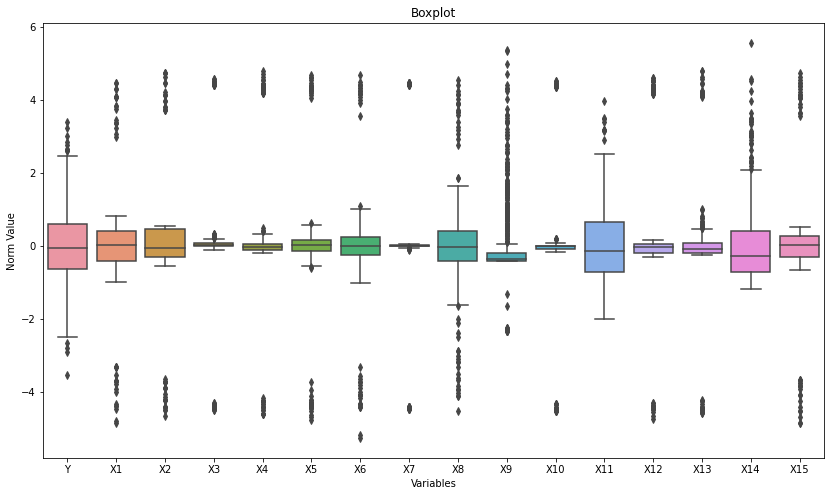

In [73]:
scaler = preprocessing.StandardScaler().fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)

plt.figure(figsize=(14,8))
ax = sns.boxplot(data=df_scaled)
ax.set(xlabel='Variables', ylabel='Norm Value', title='Boxplot')

[Text(0.5, 1.0, 'Heatmap')]

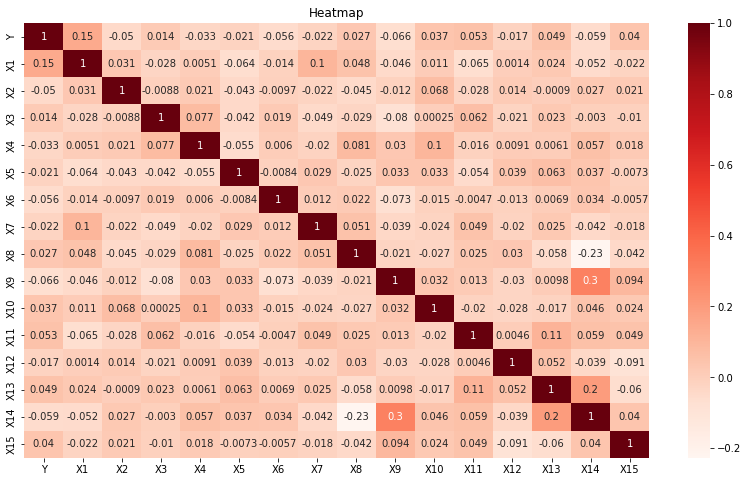

In [31]:
plt.figure(figsize=(14,8))
cor = df_scaled.corr(method = 'pearson')
ax = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
ax.set(title='Heatmap')

<Figure size 1008x576 with 0 Axes>

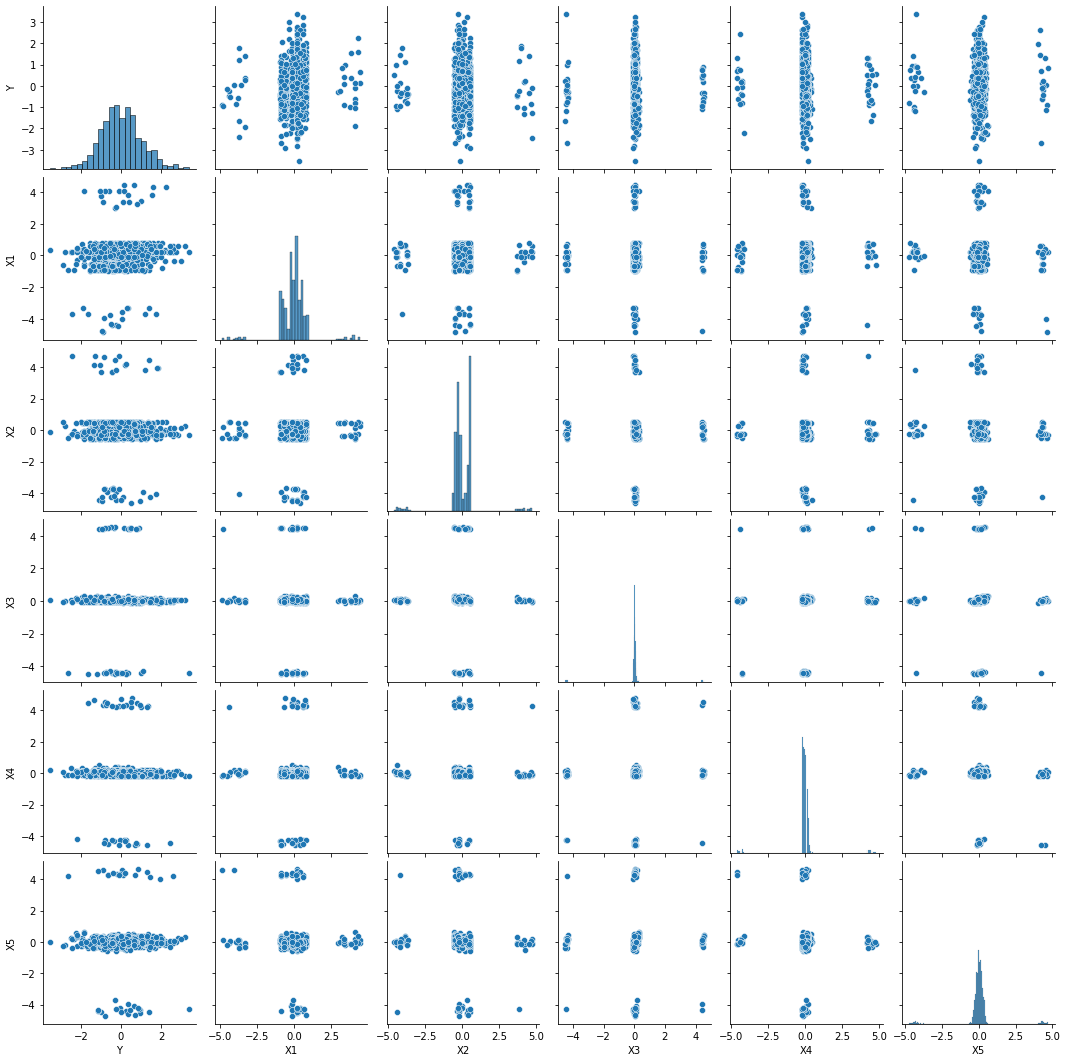

In [11]:
plt.figure(figsize=(14,8))
sns.pairplot(df_scaled[['Y', 'X1', 'X2', 'X3', 'X4', 'X5']])

<Figure size 1008x576 with 0 Axes>

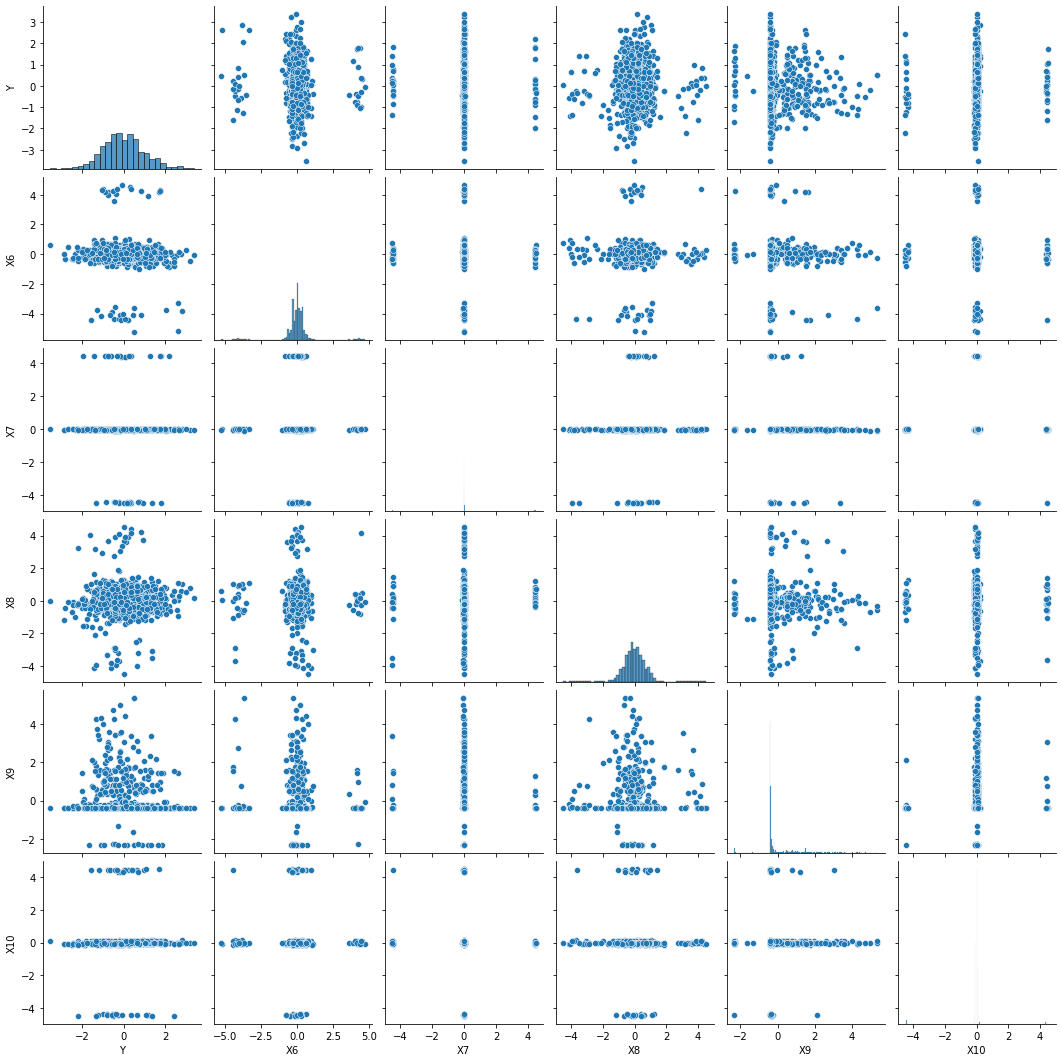

In [7]:
plt.figure(figsize=(14,8))
sns.pairplot(df_scaled[['Y', 'X6', 'X7', 'X8', 'X9', 'X10']])

<Figure size 1008x576 with 0 Axes>

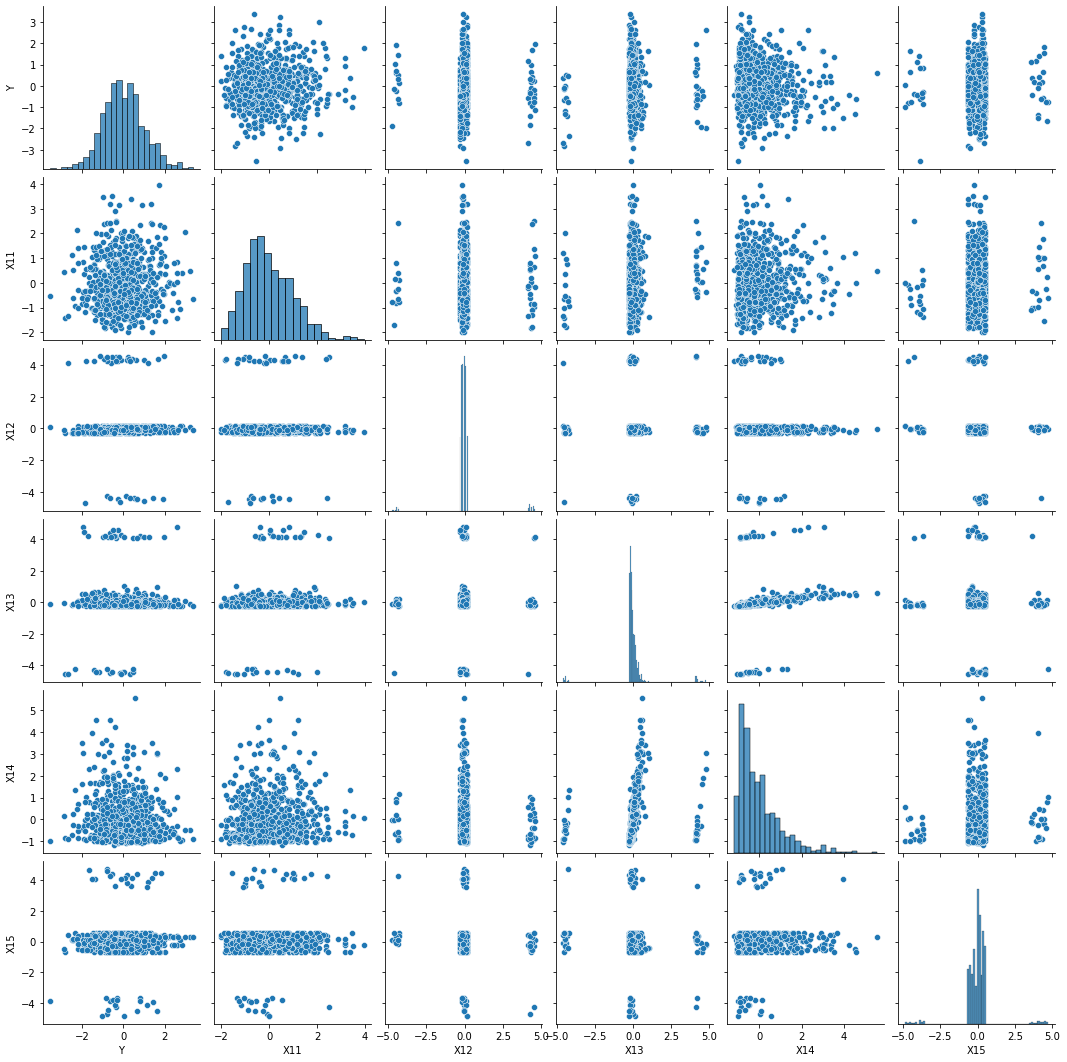

In [8]:
plt.figure(figsize=(14,8))
sns.pairplot(df_scaled[['Y', 'X11', 'X12', 'X13', 'X14', 'X15']])

## Create Step Functions
For relevent variables, use the distribution of X to create three regions:
- X>2SD          = Group 1
- 2SD>=X>-2SD    = Group 2
- X<=-2SD        = Group 3

In [74]:
def set_group(value):
    if value <= -2:
        return 3
    elif value >-2 and value <2:
        return 2
    else:
        return 1

indicator_vars = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X10', 'X12', 'X13', 'X15']
for var in indicator_vars:
    df_scaled[var] = df_scaled[var].apply(set_group)

df_scaled.head(20)

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
0,-0.587100,2,2,2,2,2,2,2,-4.128472,-0.170209,2,-1.211790,2,2,3.400798,2
1,-0.341362,2,2,2,2,2,2,2,-0.224711,-0.402665,2,-0.422147,2,2,-0.729508,2
2,-0.884352,2,2,2,2,2,2,2,0.697728,-0.402665,2,-1.823127,2,2,-0.511033,2
3,1.773076,2,2,2,2,2,2,2,-0.512512,0.604644,2,2.336145,2,2,2.083104,2
4,-0.080836,2,2,2,2,2,2,2,-0.069741,-0.363923,2,0.287440,2,2,0.665000,2
5,-0.440925,2,2,2,2,2,2,2,-0.180434,-0.402665,2,-0.225646,2,2,-0.947595,2
6,-1.081851,2,2,2,2,2,2,2,0.048331,-0.402665,2,-0.247480,2,2,-0.486835,2
7,-0.181061,2,2,2,2,2,2,2,-0.674861,4.982564,2,-1.240902,2,2,0.882743,2
8,1.328085,2,2,2,1,2,2,2,0.609174,-0.402665,2,2.423479,2,2,-0.687096,2
9,1.186992,2,1,2,2,2,2,2,-0.173054,-0.402665,2,-0.425786,2,2,-0.985055,1


In [75]:
def one_hot_encode(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[feature_to_encode], prefix=feature_to_encode, drop_first=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

for var in indicator_vars:
    df_scaled = one_hot_encode(df_scaled, var)
df_scaled.head(10)

,Y,X8,X9,X11,X14,X1_2,X1_3,X2_2,X2_3,X3_2,...,X7_2,X7_3,X10_2,X10_3,X12_2,X12_3,X13_2,X13_3,X15_2,X15_3
0,-0.587100,-4.128472,-0.170209,-1.211790,3.400798,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1,-0.341362,-0.224711,-0.402665,-0.422147,-0.729508,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
2,-0.884352,0.697728,-0.402665,-1.823127,-0.511033,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3,1.773076,-0.512512,0.604644,2.336145,2.083104,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,-0.080836,-0.069741,-0.363923,0.287440,0.665000,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
5,-0.440925,-0.180434,-0.402665,-0.225646,-0.947595,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
6,-1.081851,0.048331,-0.402665,-0.247480,-0.486835,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
7,-0.181061,-0.674861,4.982564,-1.240902,0.882743,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
8,1.328085,0.609174,-0.402665,2.423479,-0.687096,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
9,1.186992,-0.173054,-0.402665,-0.425786,-0.985055,1,0,0,0,1,...,1,0,1,0,1,0,1,0,0,0


## Write one-hot encoding as train_1

In [81]:
df_scaled[['Y', 'X8', 'X9', 'X11', 'X14']] = df[['Y', 'X8', 'X9', 'X11', 'X14']]
df_scaled.to_csv('../data/train_1.csv', index=False)
df_scaled.head(5)

,Y,X8,X9,X11,X14,X1_2,X1_3,X2_2,X2_3,X3_2,...,X7_2,X7_3,X10_2,X10_3,X12_2,X12_3,X13_2,X13_3,X15_2,X15_3
0,12.083210,-20.0,6,378,1042.80,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1,12.433754,32.9,0,595,83.55,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
2,11.659181,45.4,0,210,134.29,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3,15.449989,29.0,26,1353,736.77,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,12.805393,35.0,1,790,407.42,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


## With one-hot encoding variables dropped as train_2

In [83]:
df_no_encoding = df_scaled[['Y', 'X8', 'X9', 'X11', 'X14']]
df_no_encoding.to_csv('../data/train_2.csv', index=False)
df_no_encoding.head(5)

,Y,X8,X9,X11,X14
0,12.083210,-20.0,6,378,1042.80
1,12.433754,32.9,0,595,83.55
2,11.659181,45.4,0,210,134.29
3,15.449989,29.0,26,1353,736.77
4,12.805393,35.0,1,790,407.42


## Feature selection

In [105]:
df = pd.read_csv('../data/train.csv')
y = df['Y']
X = df.drop('Y', axis=1)

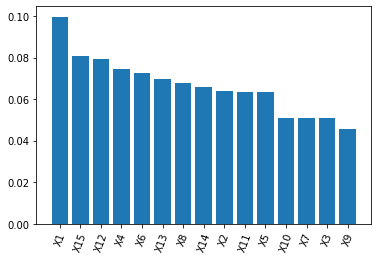

In [112]:
model = ExtraTreesRegressor(n_estimators=10)
model.fit(X, y )
var_results = list(zip(X.columns, model.feature_importances_))
var_results.sort(key=lambda var: var[1], reverse=True)

plt.bar(range(len(var_results)), [val[1] for val in var_results], align='center')
plt.xticks(range(len(var_results)), [val[0] for val in var_results])
plt.xticks(rotation=70)
plt.show()

In [102]:
df_features = df[['Y', 'X1', 'X2', 'X12', 'X15']]
df_features.to_csv('../data/train_3.csv', index=False)
df_features.head(5)

,Y,X1,X2,X12,X15
0,12.083210,16,7,6,6
1,12.433754,19,14,11,5
2,11.659181,12,14,8,5
3,15.449989,21,2,10,11
4,12.805393,11,11,8,4
